In [96]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [175]:
data = pd.read_csv("Final_Youngs_Data.csv")
data = data.iloc[:,1:data.shape[1]]
train_labels = data.iloc[:,-1]
colnames = data.columns
print(data.shape)

(180, 13)


In [120]:
validation_data = pd.read_csv('Validation_set_features.csv')
validation_data = validation_data.iloc[:,1:validation_data.shape[1]]
validation_data.columns = colnames
print(validation_data.shape)

(32, 13)


In [122]:
combined_data = pd.concat([data,validation_data],axis = 0)
combined_data.shape

(212, 13)

In [156]:
alloy_name = combined_data.iloc[:,0]
print(alloy_name.shape)
features = combined_data.iloc[:,1:combined_data.shape[1]-1]
features.head()

(212,)


,Diff. Lattice Constants,Diff. Melting Point,Mixing Enthalpy,Lattice Constants,Lambda,Diff. in atomic radii,Omega,Melting Temp.,Diff. Electronegativity,Mixing Entropy,Valence electron
0,0.487880,346.087653,-4.853717,3.172259,0.845568,4.169229,5126.805332,1693.017839,0.109326,14.698051,8.27281
1,0.449913,295.639150,-9.931969,3.028509,0.908382,3.757616,2332.647391,1806.304922,0.107517,12.826063,7.88379
2,0.381975,344.853267,-5.856117,3.357152,0.714539,4.199646,3627.716399,1685.745039,0.113094,12.602340,8.45463
3,0.365443,180.372358,-3.714500,2.951900,126.282311,0.302116,5808.140599,1871.750000,0.096695,11.526293,8.25000
4,0.418117,204.299411,-5.025233,2.980337,337.314135,0.164559,3439.052841,1891.981080,0.111454,9.134363,8.33325


[0.3489434531410193, 0.5693581183095311, 0.6868033239929, 0.8007612587839172, 0.866553019525595, 0.9082516321670497, 0.9482750242702731, 0.9734861954879019, 0.991459464291368, 0.9973785851901845, 1.0000000000000002]


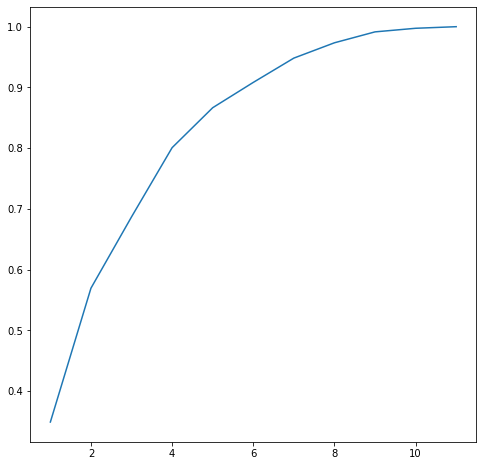

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

exp_var = []
from sklearn.decomposition import PCA
for i in range(1,12):
    pca = PCA(n_components=i)
    pca.fit(scaled_features)
    exp_var.append(pca.explained_variance_ratio_.sum())
print(exp_var)
l = list(range(1,12))
plt.figure(figsize = (8,8))
sns.lineplot(l,exp_var)
plt.show()

In [165]:
# 7 principle components
pca = PCA(n_components=7)
pc_features = pd.DataFrame(pca.fit_transform(scaled_features))
name_list = []
for i in range(1,8):
    name = 'Principle Components '+ str(i)
    name_list.append(name)
col_names = ['alloy',*name_list]

alloy_name.reset_index(drop = True, inplace = True)
pc_data = pd.concat([alloy_name,pc_features],axis = 1)
pc_data.columns = col_names
pc_data.head()

,alloy,Principle Components 1,Principle Components 2,Principle Components 3,Principle Components 4,Principle Components 5,Principle Components 6,Principle Components 7
0,Al0.5CoCrCuFeNi,1.810958,0.210680,-0.447221,1.162082,-0.574231,0.110942,0.327250
1,Al0.3CoCrFeNi,1.427375,0.248466,-0.986768,1.189055,-0.277145,-0.295270,-0.003456
2,Al0.5CrCuFeNi2,1.753335,0.452778,-0.489462,0.782682,-0.479491,-0.117743,-0.017741
3,CoCrFeNi,0.896833,1.734105,-0.849746,1.864223,-0.576060,0.165911,-0.443252
4,NiCoCr,0.636294,1.922866,-1.016949,1.505154,-0.444867,-0.083653,-0.834113


In [169]:
pc_train_features = pc_data.iloc[0:180,1:8]
pc_train_features

,Principle Components 1,Principle Components 2,Principle Components 3,Principle Components 4,Principle Components 5,Principle Components 6,Principle Components 7
0,1.810958,0.210680,-0.447221,1.162082,-0.574231,0.110942,0.327250
1,1.427375,0.248466,-0.986768,1.189055,-0.277145,-0.295270,-0.003456
2,1.753335,0.452778,-0.489462,0.782682,-0.479491,-0.117743,-0.017741
3,0.896833,1.734105,-0.849746,1.864223,-0.576060,0.165911,-0.443252
4,0.636294,1.922866,-1.016949,1.505154,-0.444867,-0.083653,-0.834113
...,...,...,...,...,...,...,...
175,-1.140016,-0.919030,0.425921,0.019916,-0.461134,0.428779,-0.044253
176,-0.521649,-0.939845,7.883528,4.846748,5.892696,-2.033409,-1.856538
177,-1.657409,-1.173763,0.320857,-0.602207,-0.393752,0.385822,-0.374268
178,-1.977349,-0.624002,0.253138,-0.829761,-0.523389,-0.036571,-0.631228


In [172]:
pc_test_features = pc_data.iloc[180:213,1:8]
pc_test_features

,Principle Components 1,Principle Components 2,Principle Components 3,Principle Components 4,Principle Components 5,Principle Components 6,Principle Components 7
180,-2.327935,2.273689,-0.327968,0.046185,0.105930,-0.091185,-0.321511
181,-2.333350,1.974304,-0.374809,-0.100544,0.280781,0.044706,-0.144634
182,-2.401692,2.184004,-0.380179,-0.038160,0.350679,0.025963,-0.015657
183,-2.396391,2.046203,-0.370250,-0.082670,0.360506,0.058776,0.041903
184,-2.470982,1.907046,-0.409243,-0.185852,0.555469,0.159436,0.319252
185,-3.328257,2.925072,-1.301482,-0.814996,2.671817,0.319975,2.459478
186,-2.304113,1.878439,-0.504337,-0.176552,0.561585,0.249828,-0.173198
187,-2.278062,2.102432,-0.326220,0.077289,0.242728,0.118482,-0.310651
188,-2.349054,1.894019,-0.324546,-0.148579,0.126490,-0.061748,-0.210954
189,-2.341400,1.830265,-0.321829,-0.162036,0.157033,-0.029351,-0.129090


In [176]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    'learning_rate': 0.1,
    'n_estimators': 1000
}

gbr = GradientBoostingRegressor(**params, random_state = 1)

from sklearn.model_selection import cross_val_score
cv_error = cross_val_score(gbr, pc_train_features, train_labels, cv = 5, scoring = 'neg_mean_absolute_error')
print(cv_error)
print(np.mean(cv_error))

[-45.58541793 -83.63443989 -88.7252798  -50.41726677 -33.18265544]
-60.3090119657056


In [179]:
from sklearn.model_selection import GridSearchCV
reg = GradientBoostingRegressor(random_state=1)
grid_value = {
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

clf = GridSearchCV(reg,grid_value,scoring='neg_mean_absolute_error',n_jobs=-1,cv = 5)
clf.fit(scaled_x_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [180]:
clf.best_score_

-78.70448997020497